## Importing dependencies

In [1]:
# Data Exploration and Manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt 

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR, LinearSVR

# Evaluation
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score
from scipy.sparse import csr_matrix    

# 1. Data Validation

### Loading dataset and getting info

In [2]:
df = pd.read_csv('toyota.csv')
df.head(25)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In the two cells abover, we can determine that there aren't any `NaN` values in the dataset 

### Getting unique values (categorical)

Model

In [5]:
print(f'Total unique values: {len(df.model.unique())}')
df.model.unique()

Total unique values: 18


array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

Transmission

In [6]:
print(f'Total unique values: {len(df.transmission.unique())}')
df.transmission.unique()

Total unique values: 4


array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

Fuel Type

In [7]:
print(f'Total unique values: {len(df.fuelType.unique())}')
df.fuelType.unique()

Total unique values: 4


array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

**Conclusions**:
* _There are ANY null vales in any feature_ 
* _There aren't typos_
* _There aren't any date inconsistencies_

# 2. Data Visualization

### Target vs dependent variables

We will take `price` as the dependent variable

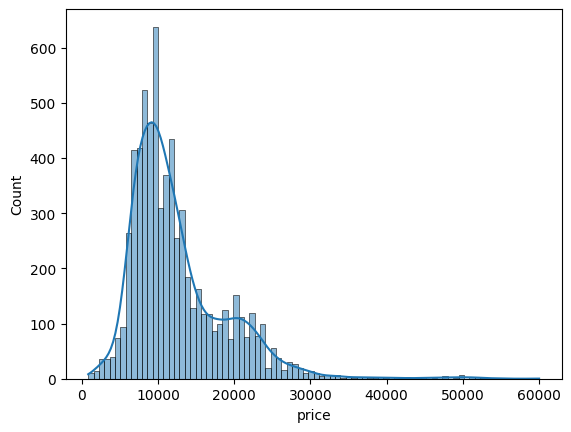

In [8]:
_ = sns.histplot(data = df, x = 'price', kde = True )

Plotting regplot of target vs rest is a good way of seeing how dependent variable is related to the independent variables/features

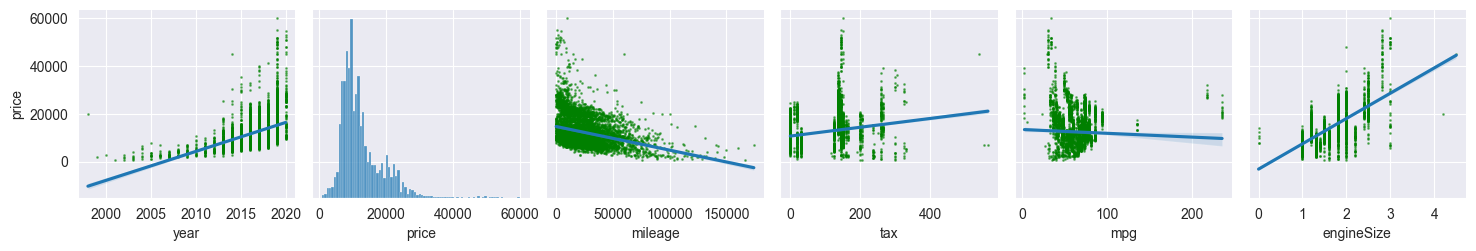

In [9]:
%matplotlib inline
sns.set_style('darkgrid')
pp = sns.pairplot(data = df, y_vars = ['price'], kind = 'reg',plot_kws = {'scatter_kws': {'alpha': 0.5, 's':1,'color': 'g',}})
plt.show()

Another great way of observing the same, is correlation heatmap

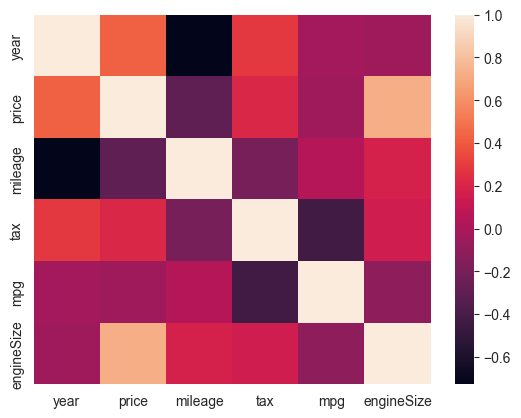

In [10]:
_ = sns.heatmap( df.corr())

### Features: numeric variables (single)

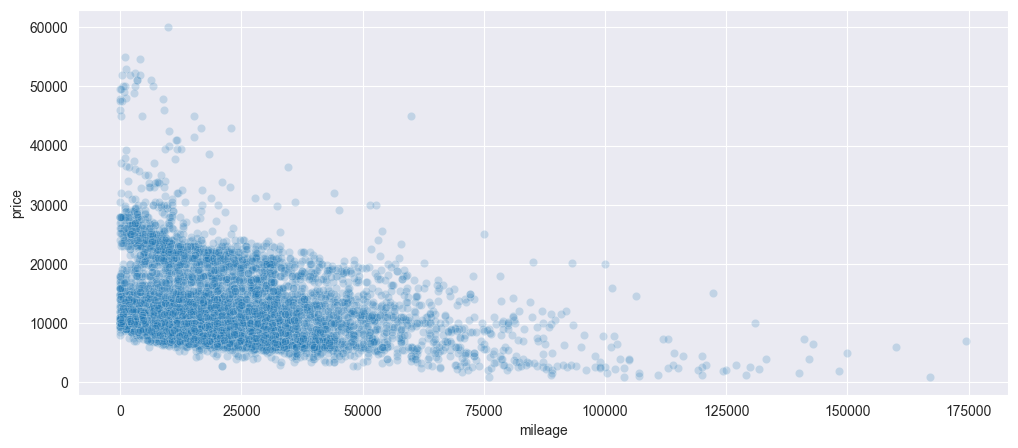

In [42]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
_ = sns.scatterplot(data = df, y = 'price', x = 'mileage', alpha = 0.2)

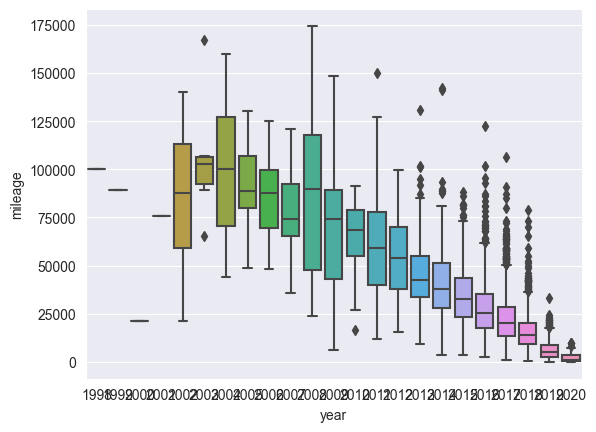

In [12]:
_ = sns.boxplot(data = df, y = 'mileage', x = 'year')

<AxesSubplot:xlabel='fuelType', ylabel='count'>

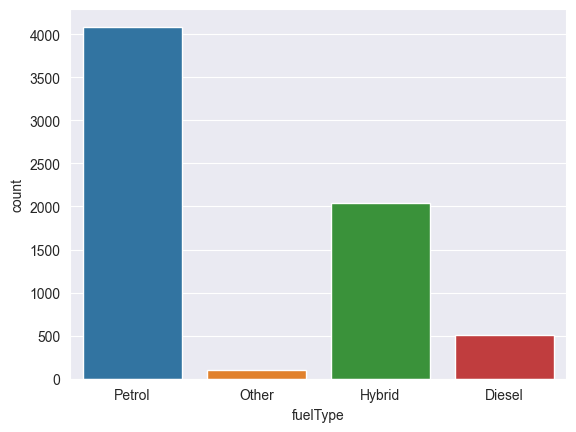

In [13]:
sns.countplot( data = df, x = 'fuelType')

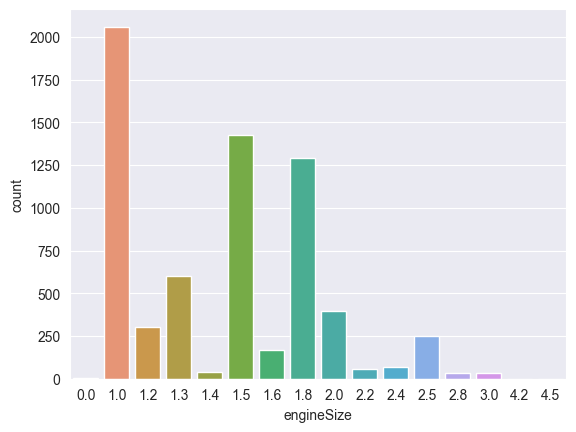

In [14]:
_ = sns.countplot( data = df, x = 'engineSize')

**Conclusions**:
* _There aren't relevant outliers_
* _Target variable seems to be moderately to strong correlated with most of the features_

# 3. DataPreprocesing

### Get rid of Nan values (columns with high number of nulls)

### Impute NAN values (columns with low number of nulls)

### Correct/get rid of outliers

### Correct typos

### Correct date/datetime inconsistencies

### Feature Enginering

* **Categorical Variables**: we will one-hot encode the following categorical variables: _`model, transmission, fuelType`_
* **Numerical Variables**: we use RobustScaler() for numerical variables: _All except `year`_
* _`year`_: We will use an ordinal encoder for year

In [15]:
X = df.drop(columns = ['price'])
y = df.price

In [16]:
# Categorical columns
cat_columns = X.select_dtypes(include = 'object').columns.tolist()
# Numerical columns
num_columns = X.select_dtypes(include = [np.number]).columns.tolist()
num_columns.remove('year')

#### Train-test split

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size = 0.8)

#### Encoder & Scaler

In [18]:
# Categorical Encoders
cat_enc = OneHotEncoder(drop = 'first', handle_unknown= 'ignore')
ord_enc = OrdinalEncoder(categories = [sorted(df.year.unique())] )

# Numerical scaler
scaler = RobustScaler()


transformer = ColumnTransformer( transformers = [
                                ('year_enc', ord_enc, ['year']),
                                ('onehot', cat_enc, cat_columns),
                                ('scaler', scaler, num_columns)
                                ])


# Fit-transform data
transformer.fit(X_train)
X_train_enc = transformer.transform(X_train)
X_test_enc = transformer.transform(X_test)

# 4. Model Selection

Since what we want to predict is the continuous variable `price`, we will need a **regression model**. We'll use:
1. **Baseline**: Support Vector Regressor - SVR
2. **Chosen**: Stochastic Gredient Descent - SGD
3. **Best**: Linear Regressor 

### Baseline

In [32]:
svm_reg = LinearSVR()
svm = svm_reg.fit(X_train_enc, y_train)

In [33]:
# We will use this only for reference (evaluation on test set comes in the next section)
y_pred_svm = svm.predict(X_train_enc)
print('(Training) R^2 score:', svm.score(X_train_enc,y_train))
print('(Training) MAE score:', MAE(y_train,y_pred_svm))

(Training) R^2 score: 0.5182743229514224
(Training) MAE score: 2422.2179119617367


### SGD + GridSearch


In [34]:
# Hyperparameters tuning with Cross Validation
grid_params = {'alpha': [0.00005,0.0001, 0.0005, 0.001], 'max_iter':  [1000, 1500, 2000], 'tol': [0.0005, 0.001, 0.005]}
sgd_reg = GridSearchCV(SGDRegressor(), param_grid= grid_params)
sgd = sgd_reg.fit(X_train_enc, y_train)

print('Best parameters:', sgd_reg.best_params_)

Best parameters: {'alpha': 5e-05, 'max_iter': 1500, 'tol': 0.0005}


In [22]:
# We will use this only for reference (evaluation on test set comes in the next section)

y_pred_sgd= sgd.predict(X_train_enc)
print('(Training) R^2 score:', sgd.score(X_train_enc,y_train))
print('(Training) MAE score:', MAE(y_train,y_pred_sgd))

(Training) R^2 score: 0.9004875649763959
(Training) MAE score: 1292.4181853182808


### Linear Regressor

In [23]:
linear = LinearRegression()
linear_model = linear.fit(X_train_enc,y_train)

In [24]:
y_pred_linear = linear_model.predict(X_train_enc)
print('(Training) R^2 score:', linear_model.score(X_train_enc,y_train))
print('(Training) MAE score:', MAE(y_train,y_pred_linear))

(Training) R^2 score: 0.929091700483476
(Training) MAE score: 1084.4947682552365


**Wow! The simple linear regressor seems to be the model with the best performance in training. Let's evaluate this in the next section on the test set**

# 5. Model Evaluation

We will use two metrics for comparison:
* _Coefficient of determination **`R^2`**:_  `model.score()`
* _Mean Absolute Error **MAE**:_  `metrics.mean_absolute_error` 

### Baseline

In [35]:
print('R^2 score:', svm.score(X_test_enc,y_test))

R^2 score: 0.5293334515310908


In [36]:
y_pred_baseline = svm.predict(X_test_enc)
print('MAE score:', MAE(y_test,y_pred_baseline))

MAE score: 2387.902505815677


### SGD + GridSearchCV

In [27]:
print('R^2 score:', sgd.score(X_test_enc,y_test))

R^2 score: 0.8981534876414291


In [28]:
y_pred_sgd= sgd.predict(X_test_enc)
print('MAE score:', MAE(y_test,y_pred_sgd))

MAE score: 1272.5863194863011


### Linear Regressor

In [29]:
print('R^2 score:', linear_model.score(X_test_enc,y_test))

R^2 score: 0.922212320159004


In [30]:
y_pred_linear= linear_model.predict(X_test_enc)
print('MAE score:', MAE(y_test,y_pred_linear))

MAE score: 1066.779762471164


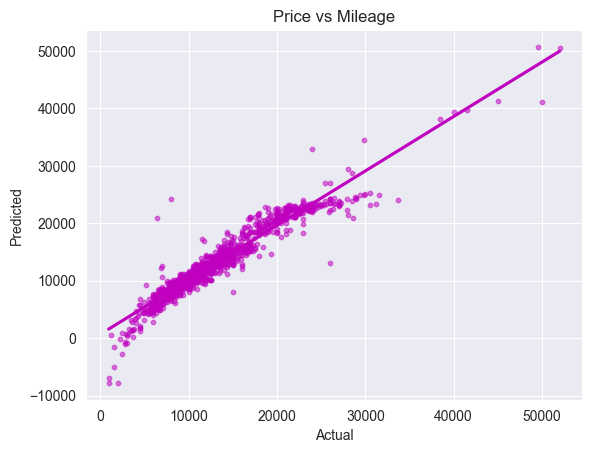

In [31]:
ax = sns.regplot(x = y_test, y = y_pred_linear, ci = True, color = 'm', scatter_kws={'alpha':0.5, 's': 10})
ax.set_title('Price vs Mileage')
_,_ = plt.xlabel('Actual'), plt.ylabel('Predicted')

**Conclusions**:
* The baseline model initially selected (SVM) had a very poor performance on this datatset, but it was used for comparison with the other models
* On  a second approach, we chose the SGD regresssor, which performed much better in terms of the metrics chosen
* The **Linear Regressor** was the best model that we could fit to our data. It yielded an R^2 over 90%. 

# 6. Business Focus and KPI's 

## Goal(s)

The main objective of this business case was to be able to predict used car prices within a 10% of it's market value (i.e acurracy of at least 90%)


## Methodology

We have treated the problem as a regression problem, with `_price_` as the target variable and the rest as the dependent variables.
We have converted all categorical and ordinal variable to numeric ones to fit all these data to a regression model suitable for the business case. 

We chose a Linear Regression model (multivariate). With it, we can make predictions about the price on new unseen data, with an accuracy of around 92%! 


## Recommendations
* It is much better to rely on a regression model that can predict car prices wiht a high accuracy instead of having sales team members do it. _Conclusion:_ The forecast process can be easily automated!!
* Bring in more and more data from past sales to fine-tune the model and obtain an even better performance

## Metrics - KPI

The business criteria was to estimate car prices within 10% of it's actual market sell price. Since the exercise required a regression problem, we can use the coefficient of determination $R^2$ as a KPI for the desired accuracy.
Additionally, we supported our analysis on a second metric: the _Mean Absolute Error_ it for comparison among models (baseline vs best).

At the end, we could report a **KPI of 92%** after the evaluation of our model.